In [1]:
import numpy as np
from typing import Callable
from matplotlib import pyplot as plt
%matplotlib inline

## Task

Змоделювати розв'язок рівняння методами Ейлера та Мільштейна (вручну та за допомогою вбудованої функції):

$dX_t = 2X_t dt + (X_t)^{1/2} dB_t$,

$X_0= x$

In [2]:
def b(t, Xt):
    return 2*Xt

def sigma(t, Xt):
    return Xt**0.5

## Euler scheme

In [3]:
def euler_scheme(
        x0: float,
        t: np.array,
        b:Callable = b,
        sigma:Callable = sigma
):
    assert t[0] == 0, "wrong time interval"

    x = np.zeros(t.shape[0])
    x[0] = x0

    for i in range(1, t.shape[0]):
        timediff = t[i] - t[i-1]
        y = np.random.normal(
            loc=0,
            scale=timediff
        )
        x[i] = x[i-1] + b(t[i-1], x[i-1])*timediff + sigma(t[i-1], x[i-1])*y

    return x

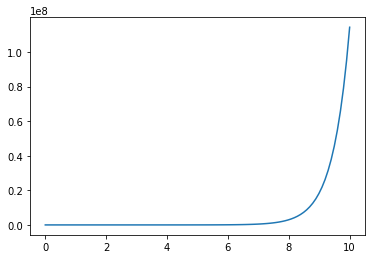

In [4]:
t = np.linspace(0,10,100)
x0 = np.random.uniform(0.5, 1.5)
x_e = euler_scheme(x0, t)

plt.plot(t,x_e)

## Milstein scheme

In [5]:
def sigma_01(t, Xt):
    return 0.5*Xt**(-0.5)

def milstein_scheme(
        x0: float,
        t: np.array,
        b:Callable = b,
        sigma:Callable = sigma
):
    assert t[0] == 0, "wrong time interval"

    x = np.zeros(t.shape[0])
    x[0] = x0

    for i in range(1, t.shape[0]):
        timediff = t[i] - t[i-1]
        y = np.random.normal(
            loc=0,
            scale=timediff
        )
        x[i] = x[i-1] + \
               b(t[i-1], x[i-1])*timediff + \
               sigma(t[i-1], x[i-1])*(y + sigma_01(t[i-1], x[i-1])*(y**2 - timediff)/2)

    return x

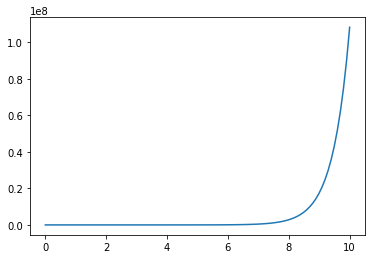

In [6]:
t = np.linspace(0,10,100)
x0 = np.random.uniform(0.5, 1.5)
x_m = milstein_scheme(x0, t)

plt.plot(t,x_m)

## Compare

/home/olga/Projects/CPI/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


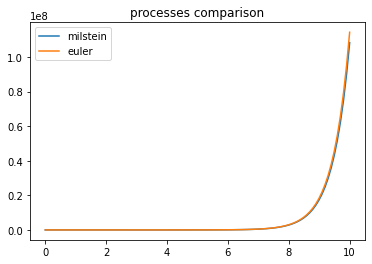

In [7]:
fig, ax = plt.subplots()
ax.plot(t, x_m, label="milstein")
ax.plot(t, x_e, label="euler")
ax.set_title("processes comparison")
ax.legend()
fig.show()

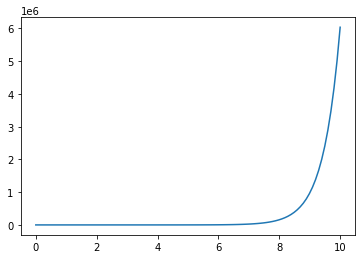

In [8]:
plt.plot(t, x_e-x_m)

In [9]:
(x_e-x_m)[-1]

6036468.035884634